#### Mini Project 2 (Built on top of Mini Project 1)
This notebook is to do EDA on data to predict default of credit card clients

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv('Client_Cards.csv')
df1.dataframeName = 'UCI_Credit_Card.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


we copy this dataset df1 into another defaulters dataset which will be used for all further computations
First look at some of the data to check if data has been read correctly

In [3]:
defaulters = df1.copy()
print(defaulters.shape)
defaulters.head()


(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


    we can see that all the 25 columns have 30000 count which indicates there is no missing value.
    we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding.

In [5]:
defaulters.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
defaulters.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


next we check the datatype of each variable of dataset. We see that all the columns are int64 type whereas from previous knowledge we know that SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default_payment_next_month are categorical features. So we convert these features in categorical


In [6]:
# checking the datatype of each feature
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
defaulters.rename(columns={'default payment next month':'def_pay'}, inplace=True)
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [8]:
defaulters.isna().sum()    # check for missing values for surity

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

no missing value hence no imputation, now we directly move towards visualzation of defaulters dataset


before moving to visualization we first select some features which we feel would be most correlated to the target variable. From the data provided we see that we want to predict whether a person will default in payment next month or not. This prediction depends mostly on previous repayment history, what is the limiting balance, age, education and marriage. Let's plot these first.

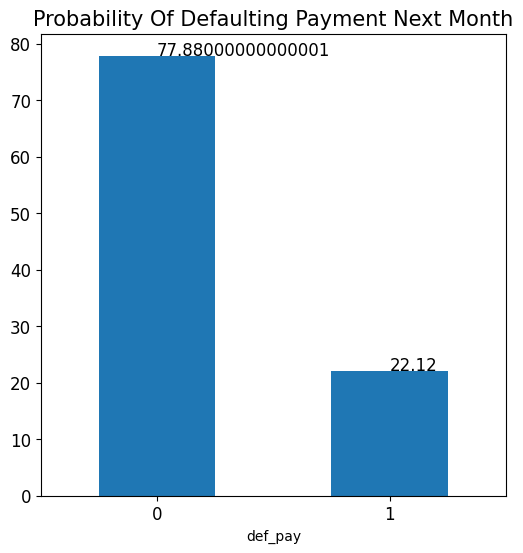

In [9]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment.

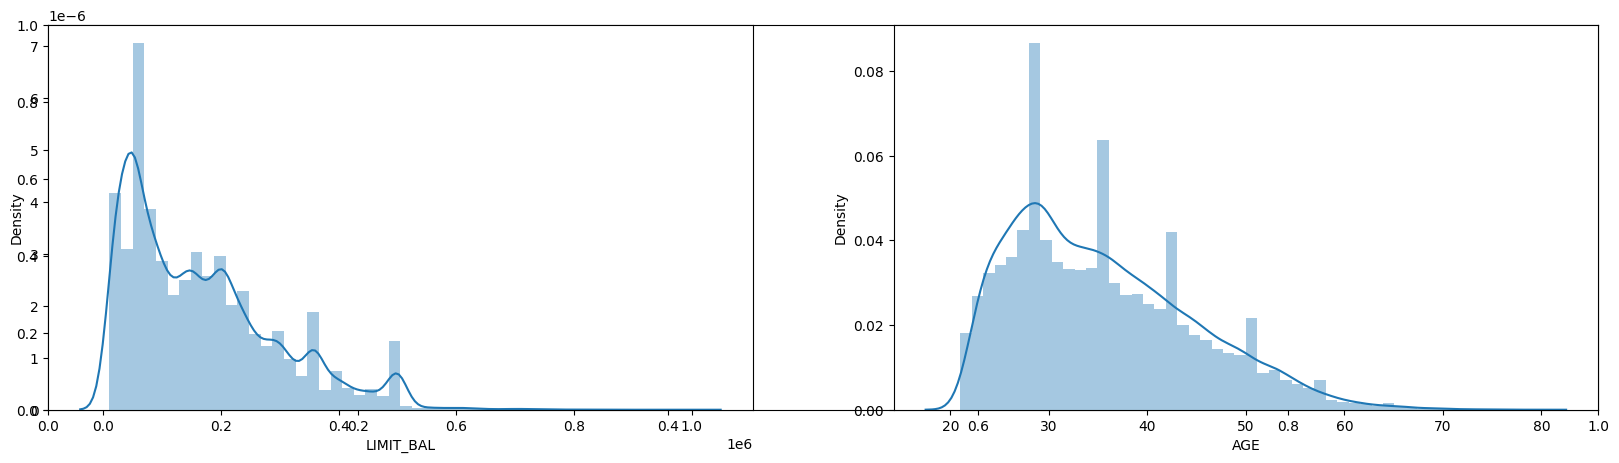

In [10]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
We will observe the effect of variables on target variable below

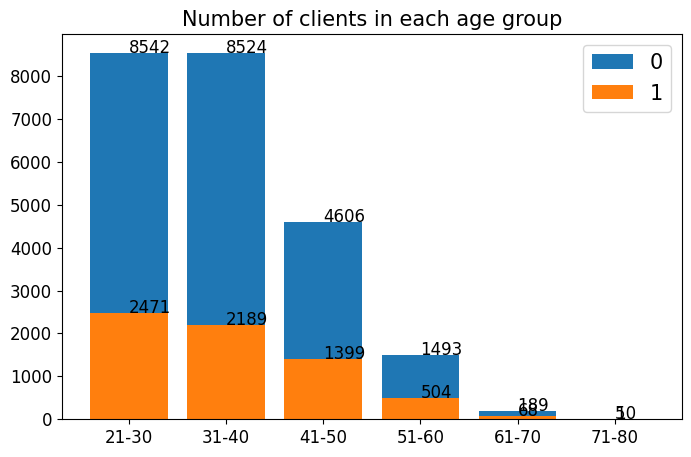

In [11]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

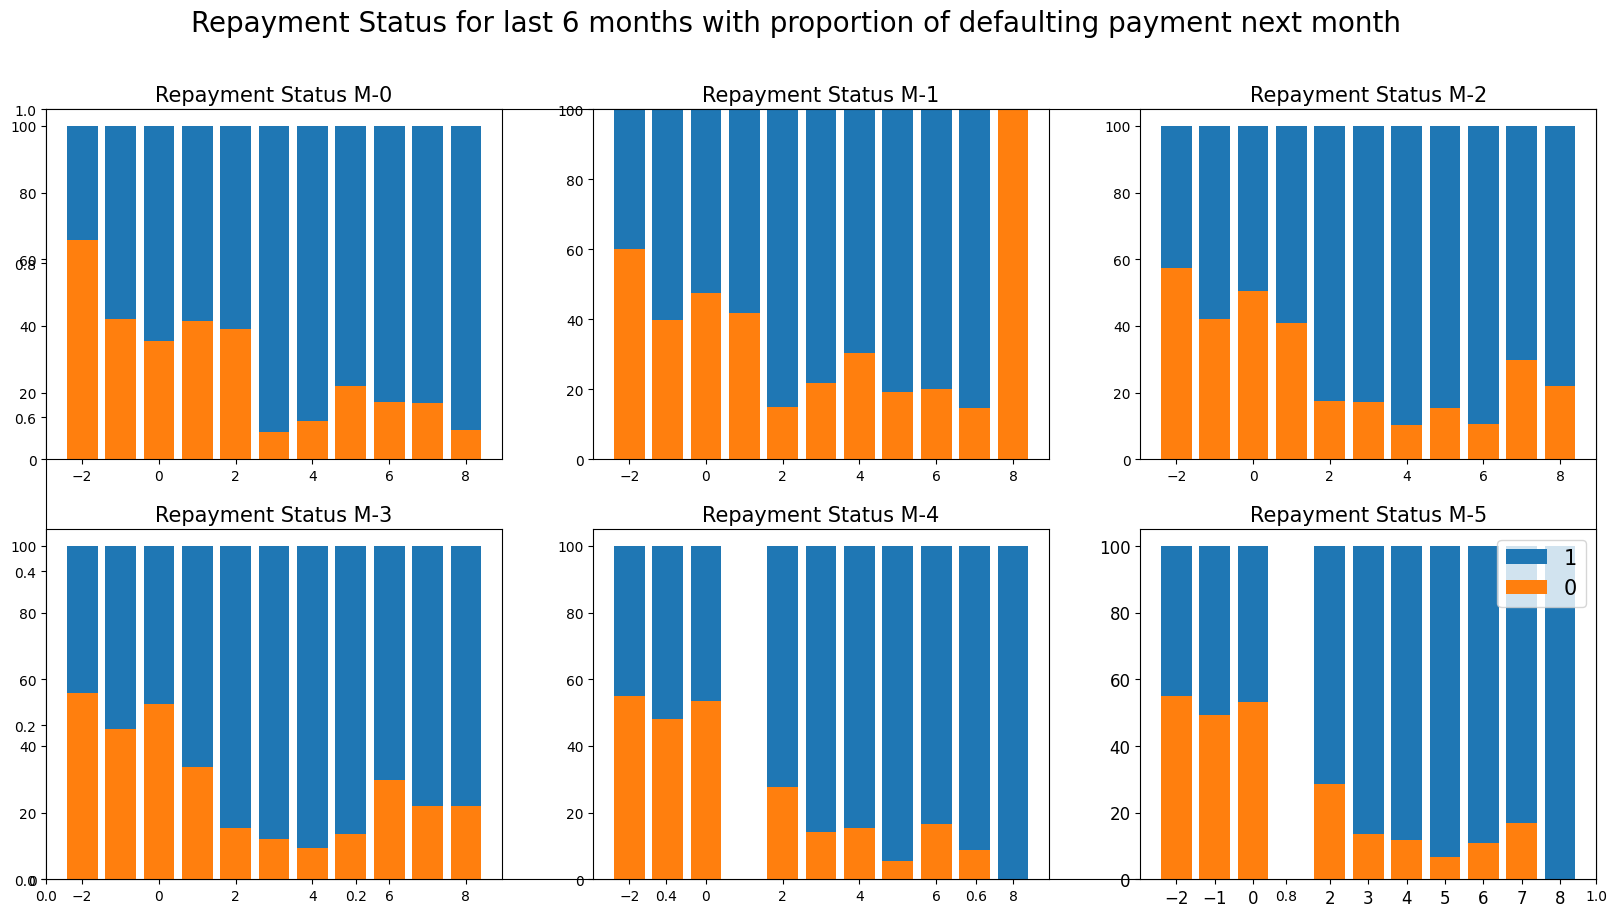

In [12]:
plt.subplots(figsize=(20,10))

ind = sorted(defaulters.PAY_1.unique())
pay_0 = (defaulters.PAY_1[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_1[defaulters['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(defaulters.PAY_2.unique())
pay_0 = (defaulters.PAY_2[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_2[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(defaulters.PAY_3.unique())
pay_0 = (defaulters.PAY_3[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_3[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(defaulters.PAY_4.unique())
pay_0 = (defaulters.PAY_4[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_4[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(defaulters.PAY_5.unique())
pay_0 = (defaulters.PAY_5[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_5[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(defaulters.PAY_6.unique())
pay_0 = (defaulters.PAY_6[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_6[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

Above plot shows us the proportion of clients that will default payment next month based on repayment history.
For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.


In [13]:
default0 = defaulters.groupby(defaulters['PAY_1'][defaulters['def_pay'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = defaulters.groupby(defaulters['PAY_1'][defaulters['def_pay'] == 1]).size().reset_index(name='DEFAULT')
total = defaulters.groupby('PAY_1').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_1'] = ['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table

,PAY_1,NOT_DEFAULT,DEFAULT,TOTAL
0,No Consumption,2394,365,2759
1,Paid in Full,4732,954,5686
2,Use Revolving Credit,12849,1888,14737
3,Delay 1 mth,2436,1252,3688
4,Delay 2 mths,823,1844,2667
5,Delay 3 mths,78,244,322
6,Delay 4 mths,24,52,76
7,Delay 5 mths,13,13,26
8,Delay 6 mths,5,6,11
9,Delay 7 mths,2,7,9


In [14]:
pay1Table['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
pay1Table['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

pay1Pct = pay1Table.iloc[:,0:3]
pay1Pct = pay1Pct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

pay1Pct

,PAY_1,NOT_DEFAULT(%),DEFAULT(%)
0,No Consumption,86.77,13.23
1,Paid in Full,83.22,16.78
2,Use Revolving Credit,87.19,12.81
3,Delay 1 mth,66.05,33.95
4,Delay 2 mths,30.86,69.14
5,Delay 3 mths,24.22,75.78
6,Delay 4 mths,31.58,68.42
7,Delay 5 mths,50.00,50.00
8,Delay 6 mths,45.45,54.55
9,Delay 7 mths,22.22,77.78


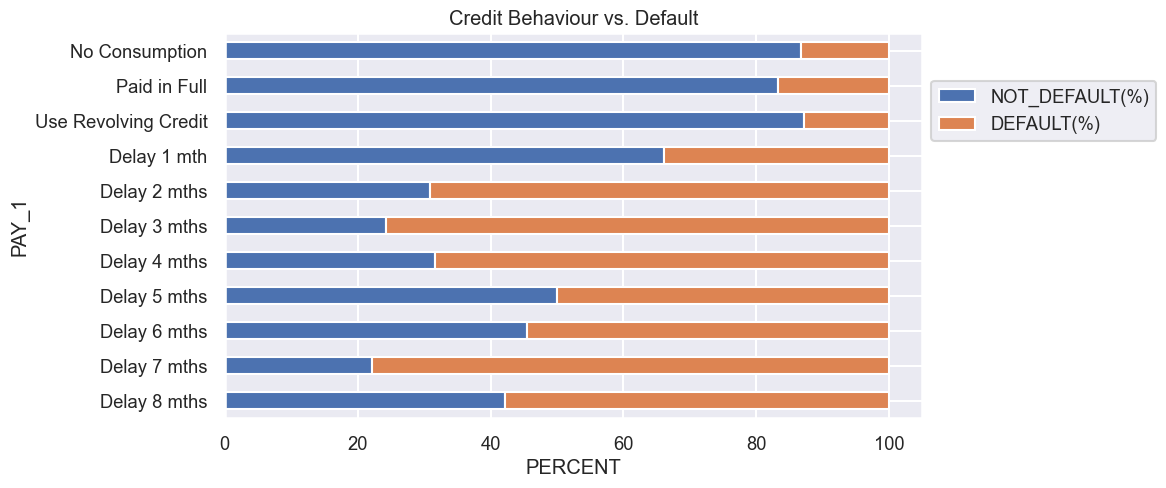

In [15]:
sns.set(rc={'figure.figsize':(9,5)})
sns.set_context("talk", font_scale=0.8)

ax = pay1Pct.sort_index(ascending=False).plot(x='PAY_1', kind='barh', stacked=True, title='Credit Behaviour vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

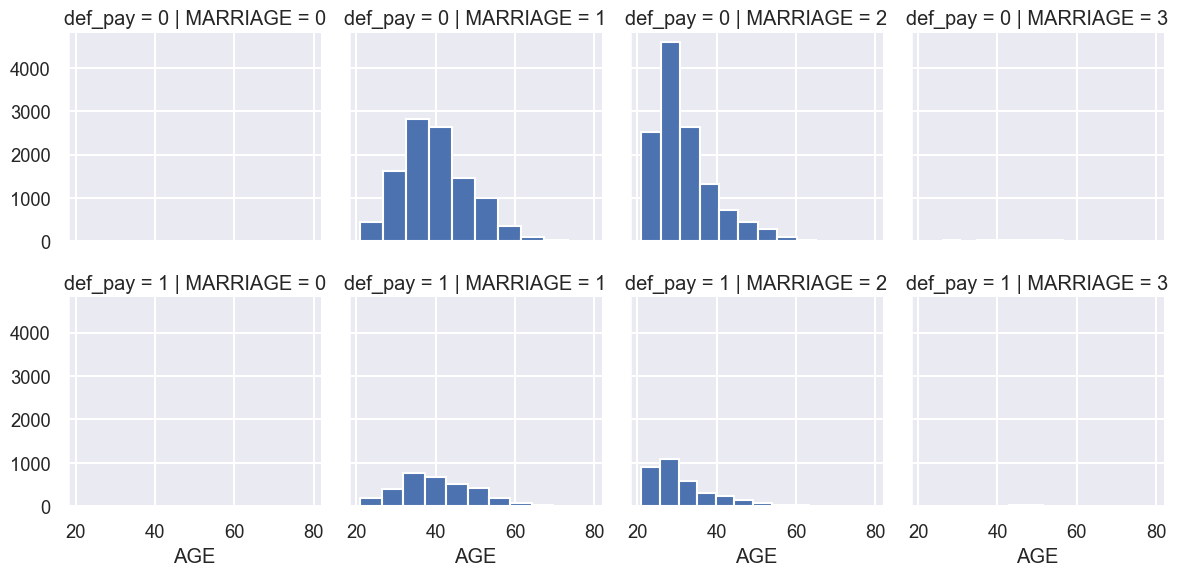

In [16]:
g = sns.FacetGrid(defaulters, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month


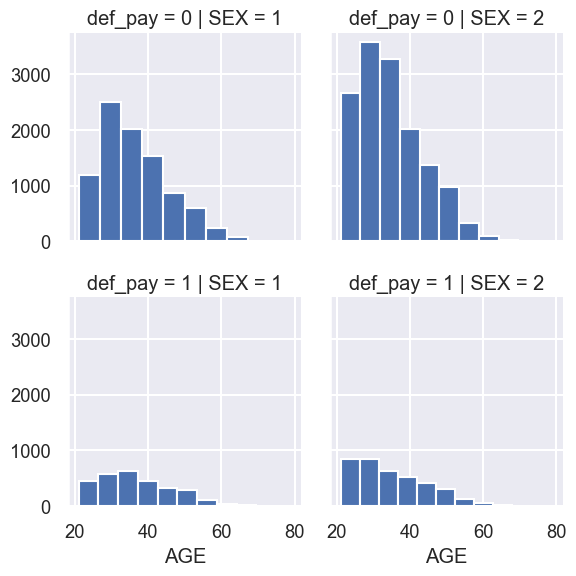

In [17]:
g = sns.FacetGrid(defaulters, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

now we will check if the past six months bill amount will affect the payment default next month or not:

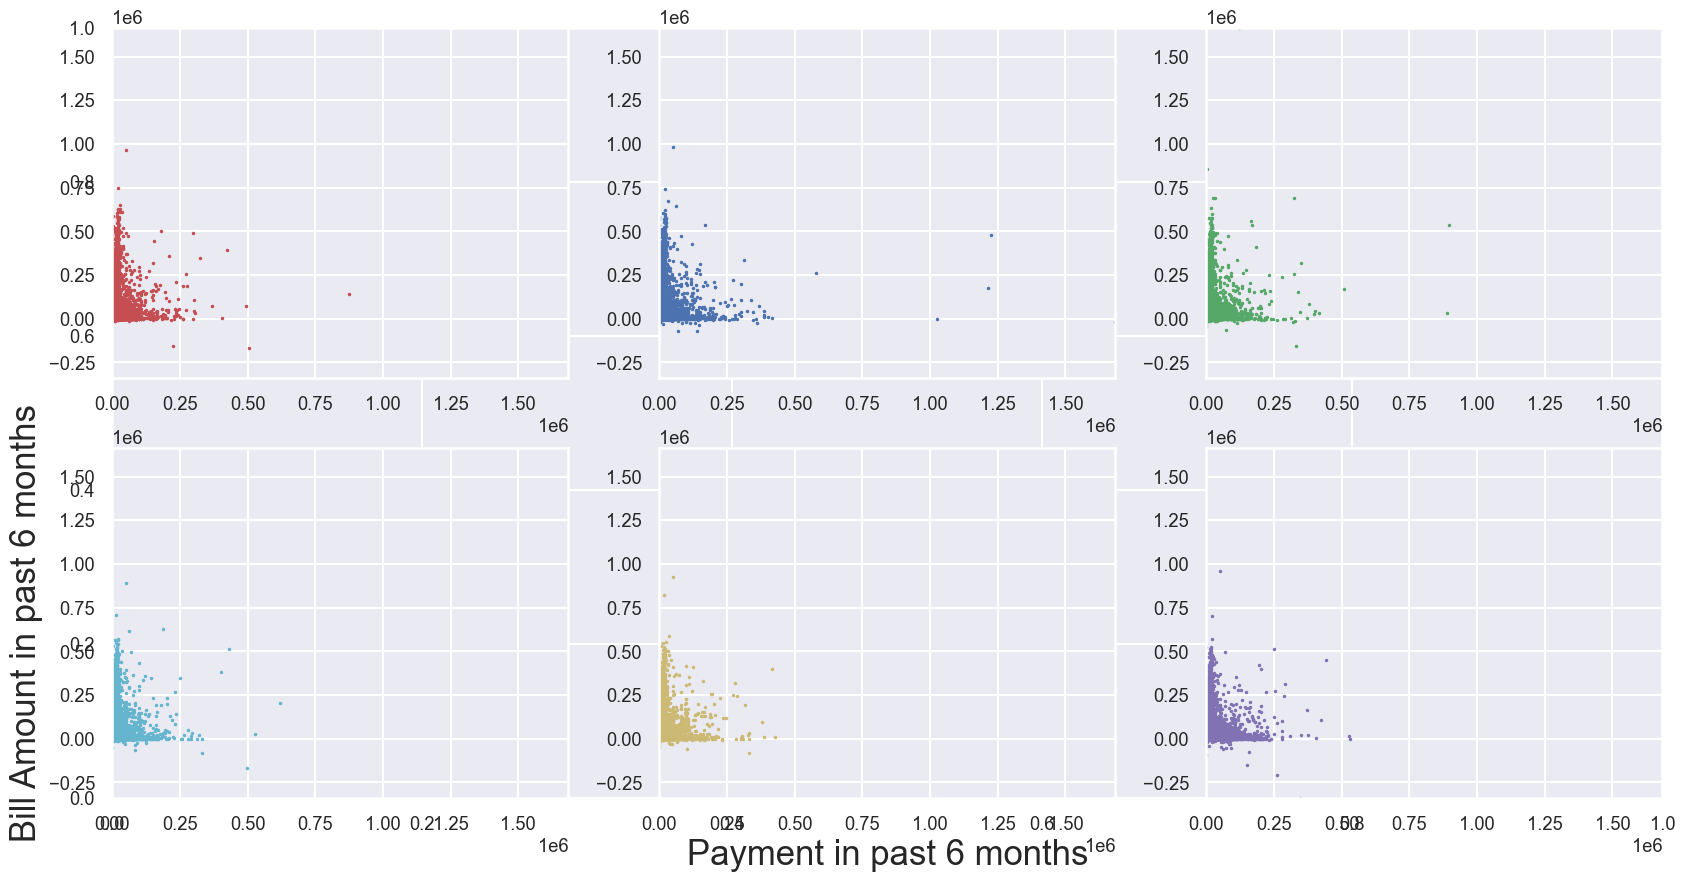

In [18]:
# Define the limits for x and y axis
x_min = min(defaulters[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].min())
x_max = max(defaulters[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].max())
y_min = min(defaulters[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].min())
y_max = max(defaulters[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].max())

plt.subplots(figsize=(20, 10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()


Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

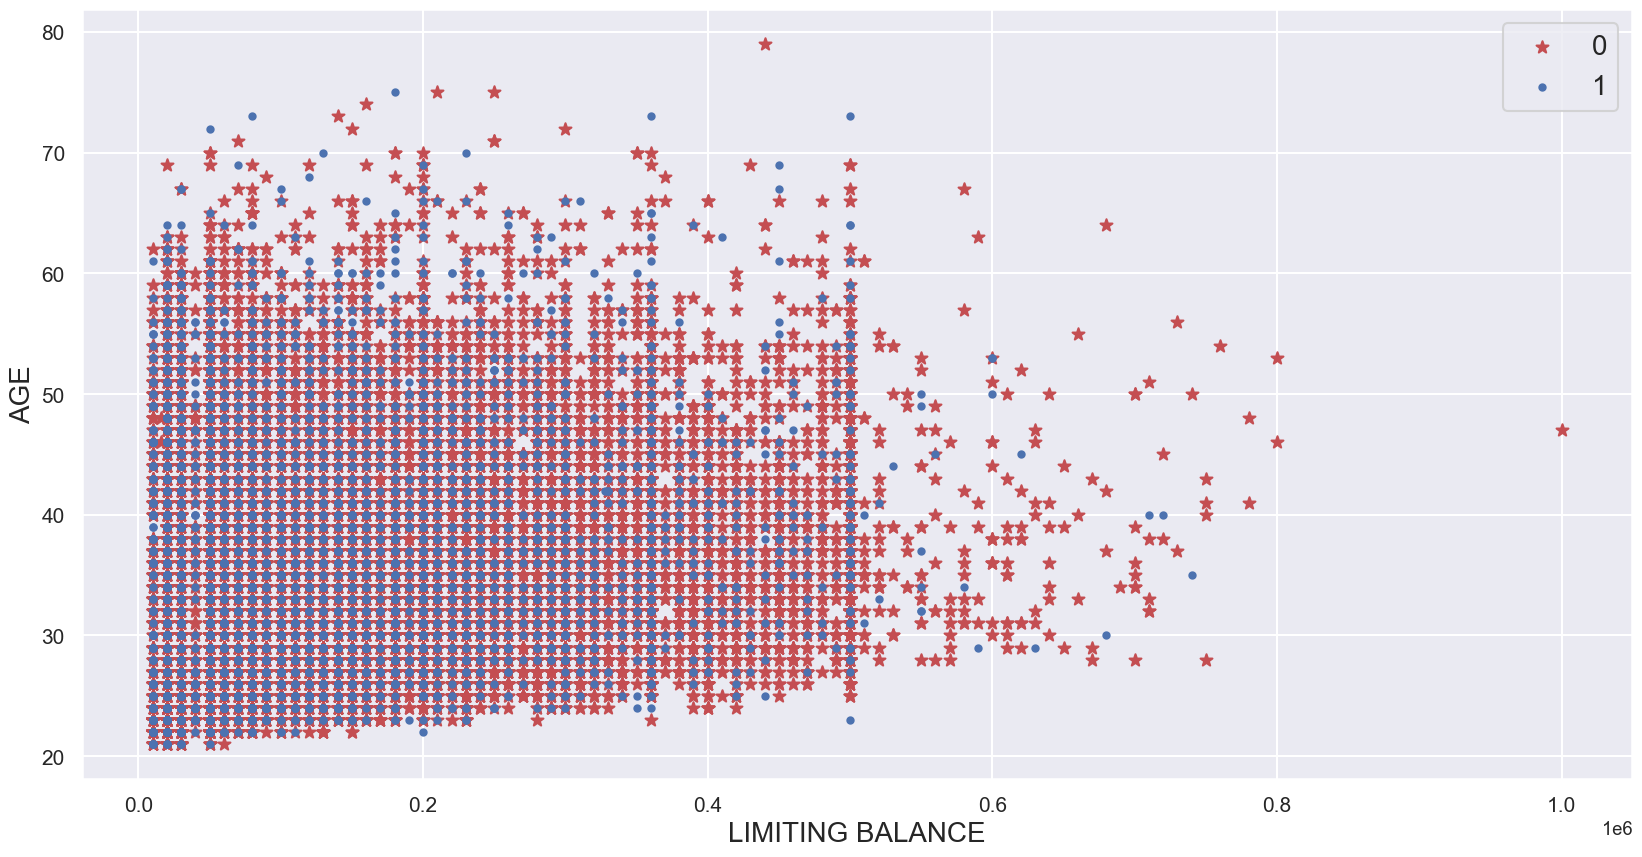

In [19]:
y1 = defaulters.AGE[defaulters["def_pay"] == 0]
y2 = defaulters.AGE[defaulters["def_pay"] == 1]
x1 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 0]
x2 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()

In [20]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [21]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  int64   
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  int64   
 13  BILL_AMT2  30000 non-null  int64   
 14  BILL_AMT3  30000 non-null  int64   
 15  BILL_AMT4  30000 non-null  int64   
 16  BILL_AMT5  30000 non-null  int64   
 17  BILL_AMT6  30000 non-null  int64   
 18  PAY_AMT1   30000 non-null  int64   
 19  PAY_AMT2   30000 non-null

In [22]:
temp_defaulters = defaulters.drop('AGE_BIN', axis=1)

Above plot of Age against limiting balance does not provide any accurate information, as there is mixed variation of clients of all age groups and their current month limiting balance.

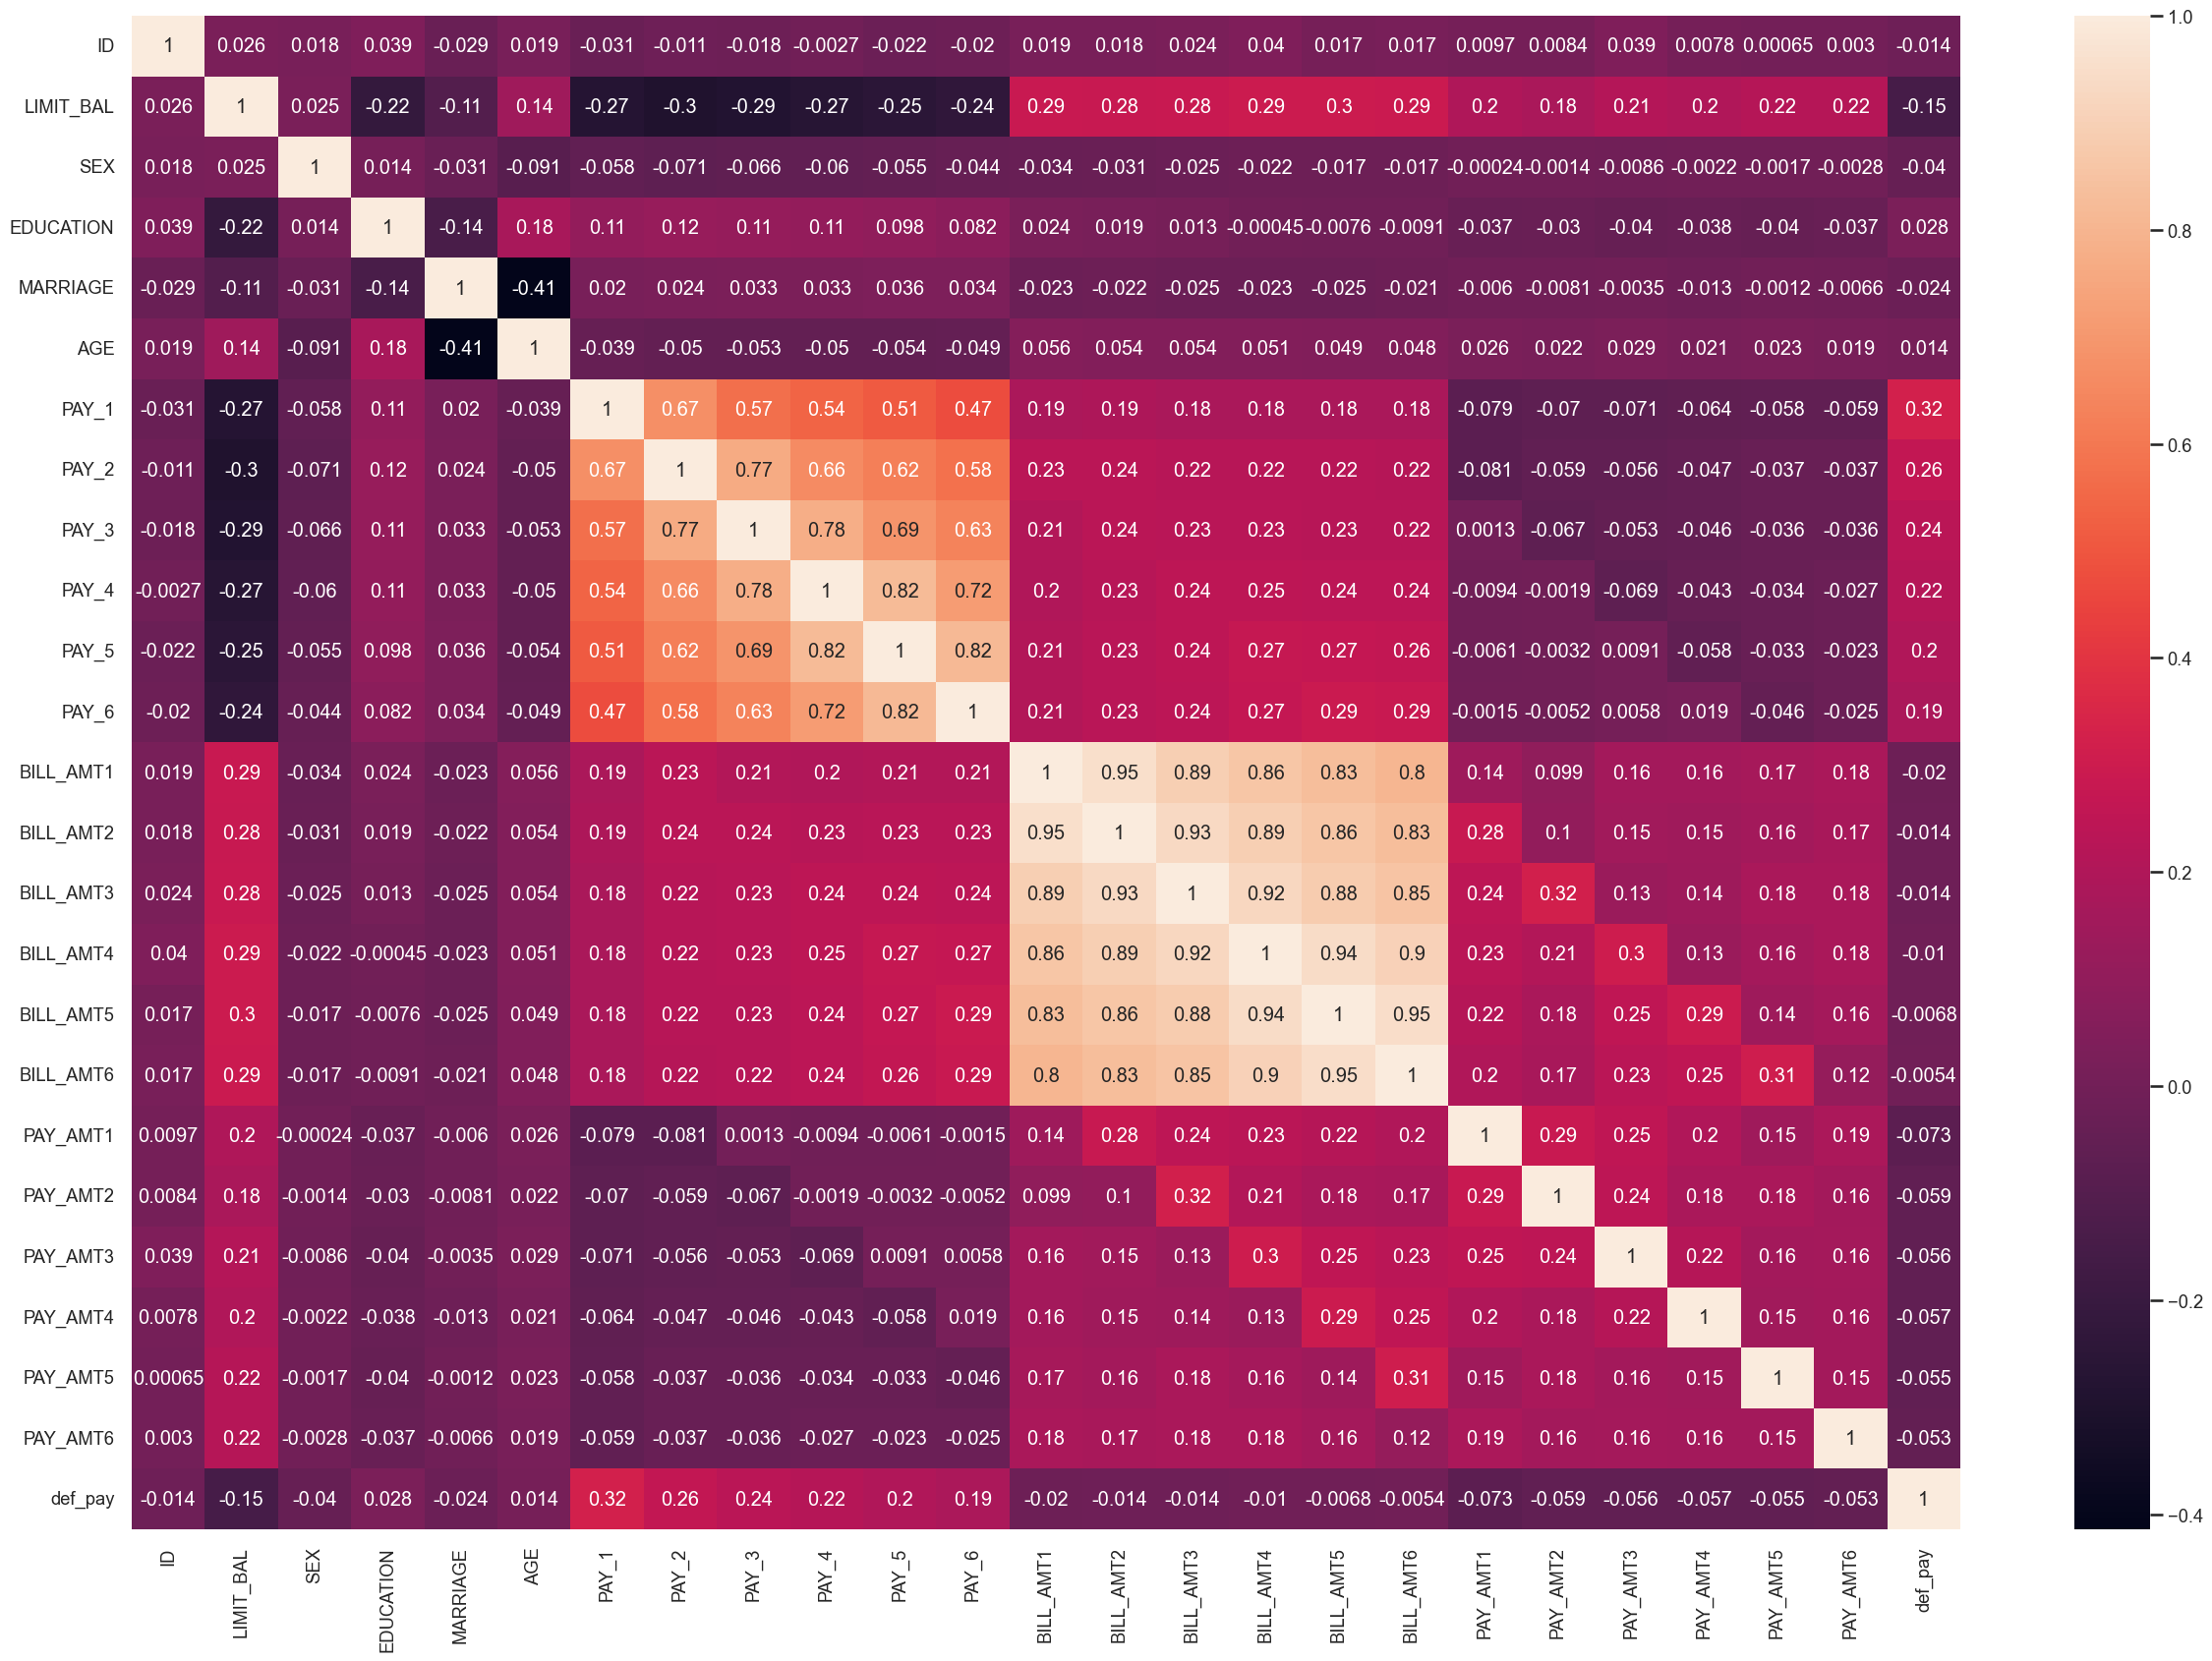

In [23]:
plt.subplots(figsize=(30,20))
sns.heatmap(temp_defaulters.corr(), annot=True)
plt.show()

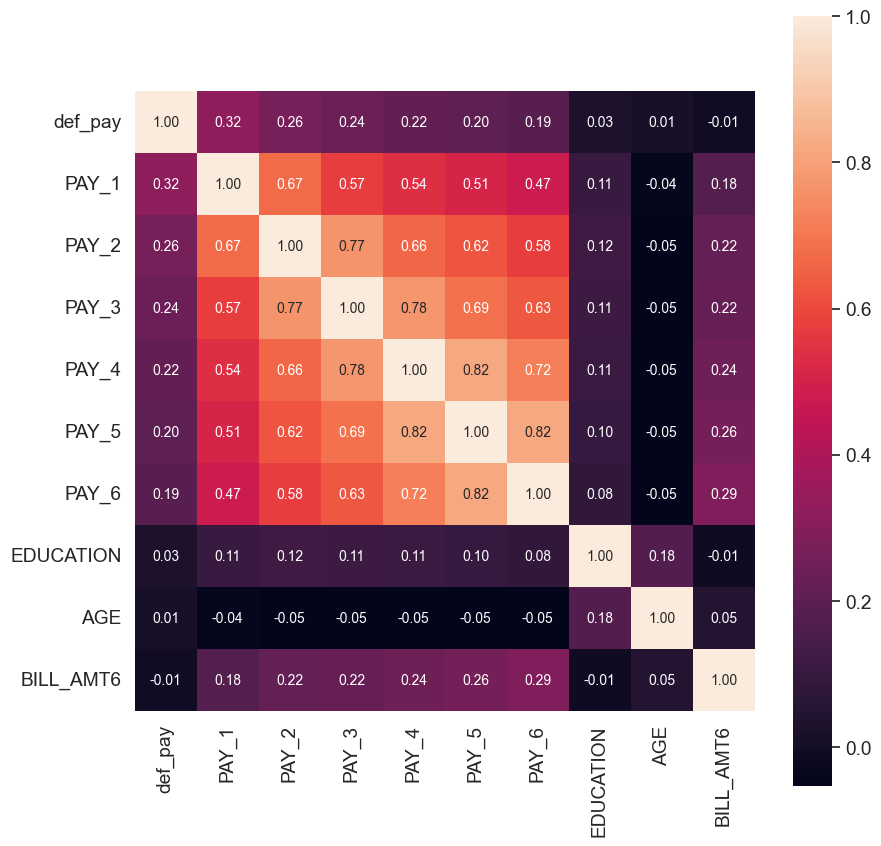

In [24]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = temp_defaulters.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(temp_defaulters[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

as we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features.

We will first train model wil all the features and try reducing the non-important features.

### Getting ready to run machine Learning

##### function to try all the models

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

#### Function to initialise the Model Parameters !! get_model_and_param_grid(model_type):

In [26]:
def get_model_and_param_grid(model_type):
    if model_type == "LogisticRegression":
        model = LogisticRegression()
        apply_scaling = True
        param_grid = {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.01, 0.1, 1, 10, 100]
        }
        is_ensemble_allowed = True
    elif model_type == "DecisionTree":
        model = DecisionTreeClassifier()
        apply_scaling = False
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50]
        }
        is_ensemble_allowed = True
    elif model_type == "RandomForest":
        model = RandomForestClassifier()
        apply_scaling = False
        param_grid = {
            'n_estimators': [10, 50, 100, 200],
            'criterion': ['gini'],
            'max_depth': [None, 10, 20, 30, 40, 50]
        }
        is_ensemble_allowed = True
    elif model_type == "KNeighbors":
        model = KNeighborsClassifier()
        apply_scaling = True
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance']
        }
        is_ensemble_allowed = False
    elif model_type == "SVM":
        model = SVC(probability=True)
        apply_scaling = True
        param_grid = {
            'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
        is_ensemble_allowed = False
    elif model_type == "AdaBoost":
        model = AdaBoostClassifier()
        apply_scaling = False
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
        is_ensemble_allowed = False
    elif model_type == "XGBoost":
        model = XGBClassifier()
        apply_scaling = False
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
        is_ensemble_allowed = False
    elif model_type == "Bagging":
        model = BaggingClassifier(estimator=DecisionTreeClassifier())
        apply_scaling = False
        param_grid = {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'max_features': [0.5, 0.7, 1.0]
        }
        is_ensemble_allowed = False
    elif model_type == "Stacking":
        base_estimators = [
            ('lr', LogisticRegression()),
            ('dt', DecisionTreeClassifier()),
            ('rf', RandomForestClassifier())
        ]
        model = StackingClassifier(estimators=base_estimators, final_estimator=SVC(probability=True))
        apply_scaling = False
        param_grid = {
            'final_estimator__C': [0.01, 0.1, 1],
            'final_estimator__kernel': ['linear', 'rbf']
        }
        is_ensemble_allowed = False
    else:
        raise ValueError("Invalid model type provided.")
    
    return model, param_grid, apply_scaling, is_ensemble_allowed

#### Function to scale Feature of not, based on the model Type !! Scale_features(X, apply_scaling):

In [27]:
## Function to scale Feature of not, based on the model Type
def scale_features(X, apply_scaling):
    if apply_scaling:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    return X

#### function to split data !! split_data(X, y, test_size=0.3, random_state=42):

In [28]:
## Function to split data
def split_data(X, y, test_size=0.3, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

#### Function to perform Grid Search !! perform_grid_search(model, param_grid, X_train, y_train):

In [29]:
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

#### Function to Perform ensemble grid search !! perform_ensemble_grid_search()

In [30]:
def perform_ensemble_grid_search(X_train, y_train, model_type):
    
    model1, param_grid1, _, _ = get_model_and_param_grid('LogisticRegression')
    model2, param_grid2, _, _ = get_model_and_param_grid('DecisionTree')
    model3, param_grid3, _, _ = get_model_and_param_grid('RandomForest')
    
    model1 = perform_grid_search(model1, param_grid1, X_train, y_train)
    model2 = perform_grid_search(model2, param_grid2, X_train, y_train)
    model3 = perform_grid_search(model3, param_grid3, X_train, y_train)
    
    ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3)], voting='soft')
    ensemble_model.fit(X_train, y_train)
    return ensemble_model

#### Funciton to bind all metrics !! evaluate_metrics()

In [31]:
def evaluate_metrics(y_true, y_pred, y_prob):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_prob)
    }
    return metrics

#### function to plot confusion metrics !! plot_confusion_matrix()

In [32]:
## Function to plot confusion Matrix
def plot_confusion_matrix(y_true, y_pred, target_labels, model_type):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    cm_labels = np.array([[f'TN\n{tn}', f'FP\n{fp}'], [f'FN\n{fn}', f'TP\n{tp}']])

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues',
                xticklabels=[f'Predicted: {target_labels[0]}', f'Predicted: {target_labels[1]}'],
                yticklabels=[f'Actual: {target_labels[0]}', f'Actual: {target_labels[1]}'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_type}')
    plt.show()

#### funciton to plot RUC Curve !! plot_roc_curve()

In [33]:
## Function to plot RUC Curve
def plot_roc_curve(y_true, y_prob, model_type):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label=f'{model_type} (AUC = {roc_auc_score(y_true, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

#### funciton to plot train vs test accuracy and Misclassification !! plot_accuracy_and_misclassification(train_metrics, test_metrics, model_type)

In [34]:
def plot_accuracy_and_misclassification(train_metrics, test_metrics, model_type):
    plt.figure(figsize=(10, 6))
    
    metrics_df = pd.DataFrame({
        'Metric': ['Train Accuracy', 'Test Accuracy', 'Train Misclassification', 'Test Misclassification'],
        'Value': [train_metrics['accuracy'], test_metrics['accuracy'],
                  1 - train_metrics['accuracy'], 1 - test_metrics['accuracy']]
    })
    
    sns.barplot(x='Metric', y='Value', data=metrics_df)
    plt.title(f'Accuracy and Misclassification for {model_type}')
    plt.ylabel('Value')
    plt.show()

#### function to perfrom !! evaluate_classification_model(df, target_var, feature_list, model_type, target_labels):

In [35]:
def evaluate_classification_model(df, target_var, feature_list, model_type, target_labels, run_ensemble_mode=False):
    X = df[feature_list]
    y = df[target_var]
    
    try:
        if not run_ensemble_mode:
            # Initialize the model and parameter grid
            model, param_grid, apply_scaling, is_ensemble_allowed = get_model_and_param_grid(model_type)
            # Apply scaling if necessary
            X = scale_features(X, apply_scaling)
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = split_data(X, y)
            # Perform GridSearchCV
            optimized_clf = perform_grid_search(model, param_grid, X_train, y_train)
            ensemble_model_name = model_type
        
        if run_ensemble_mode:
            # Use an ensemble voting classifier
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = split_data(X, y)
            optimized_clf = perform_ensemble_grid_search(X_train, y_train, model_type)
            ensemble_model_name = model_type
     
        
        # Predictions
        train_preds = optimized_clf.predict_proba(X_train)[:, 1]
        test_preds = optimized_clf.predict_proba(X_test)[:, 1]
        train_class_preds = optimized_clf.predict(X_train)
        test_class_preds = optimized_clf.predict(X_test)
        
        # Evaluate metrics
        train_metrics = evaluate_metrics(y_train, train_class_preds, train_preds)
        test_metrics = evaluate_metrics(y_test, test_class_preds, test_preds)

        print(f"Model: {ensemble_model_name}")
        print("The accuracy on train data is ", train_metrics['accuracy'])
        print("The accuracy on test data is ", test_metrics['accuracy'])
        print("The precision on train data is ", train_metrics['precision'])
        print("The precision on test data is ", test_metrics['precision'])
        print("The recall on train data is ", train_metrics['recall'])
        print("The recall on test data is ", test_metrics['recall'])
        print("The f1 on train data is ", train_metrics['f1'])
        print("The f1 on test data is ", test_metrics['f1'])
        print("The roc_auc_score on test data is ", test_metrics['roc_auc'])
        
        plot_confusion_matrix(y_test, test_class_preds, target_labels, ensemble_model_name)
        plot_roc_curve(y_test, test_preds, ensemble_model_name)
        plot_accuracy_and_misclassification(train_metrics, test_metrics, ensemble_model_name)
        
        # Return metrics and test predictions for ROC curve
        return {
            'model_type': ensemble_model_name,
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'test_preds': test_preds,
            'y_test': y_test
        }
    except ValueError as e:
        print(e)
        return None

#### Function to run all models + Ensemble mode

In [36]:
def evaluate_classification_models(models, df, target_var, feature_list, target_labels):
    results = []

    run_ensemble_mode = False

    ## Run for all modles
    for model in models:
        result = evaluate_classification_model(df, target_var, feature_list, model, target_labels, run_ensemble_mode)
        if result is not None:
            results.append(result)
    ## Run for Ensemble model 
    run_ensemble_mode = True
    if run_ensemble_mode:
        model = 'ensemble_ML'
        result = evaluate_classification_model(df, target_var, feature_list, model, target_labels, run_ensemble_mode)
        if result is not None:
            results.append(result)

    # Convert results to a DataFrame for easier plotting
    metrics_df = pd.DataFrame({
        'model_type': [res['model_type'] for res in results],
        'test_accuracy': [res['test_metrics']['accuracy'] for res in results],
        'test_precision': [res['test_metrics']['precision'] for res in results],
        'test_recall': [res['test_metrics']['recall'] for res in results],
        'test_f1': [res['test_metrics']['f1'] for res in results],
        'test_roc_auc': [res['test_metrics']['roc_auc'] for res in results]
    })

    # Plot the metrics comparison for all models
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='model_type', y=f'test_{metric}', data=metrics_df)
        plt.title(f'Test {metric.capitalize()} Comparison')
        plt.ylabel(f'Test {metric.capitalize()}')
        plt.xlabel('Model Type')
        plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
        plt.show()

    # Plot ROC AUC curves for all models
    plt.figure(figsize=(10, 8))
    for result in results:
        model_type = result['model_type']
        fpr, tpr, _ = roc_curve(result['y_test'], result['test_preds'])
        plt.plot(fpr, tpr, label=f"{model_type} (AUC = {result['test_metrics']['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc='best')
    plt.show()

#### use this function

### Defining my Tragte and Features
#### starting with all the features becasue all those features are putting impact on the target vairable

In [37]:


target_var = 'def_pay'
feature_list = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','AGE',\
                'PAY_1','PAY_2','PAY_3','PAY_4', 'PAY_5','PAY_6', \
                'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', \
                'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',  ]
target_lables = ['Yes','No']

Model: LogisticRegression
The accuracy on train data is  0.8113809523809524
The accuracy on test data is  0.809
The precision on train data is  0.7208153180975911
The precision on test data is  0.680119581464873
The recall on train data is  0.24957228400342174
The recall on test data is  0.23214285714285715
The f1 on train data is  0.37077045274027004
The f1 on test data is  0.34613921643210344
The roc_auc_score on test data is  0.722860114216141


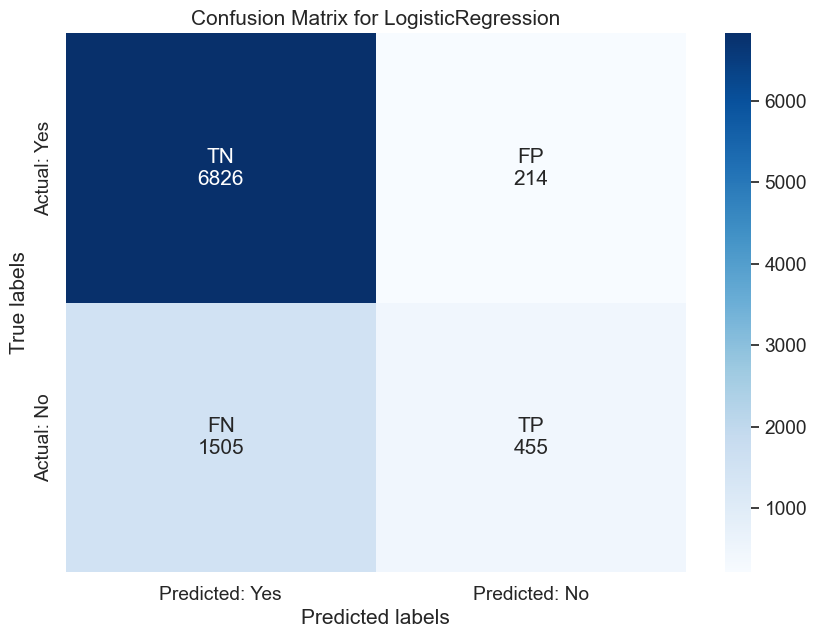

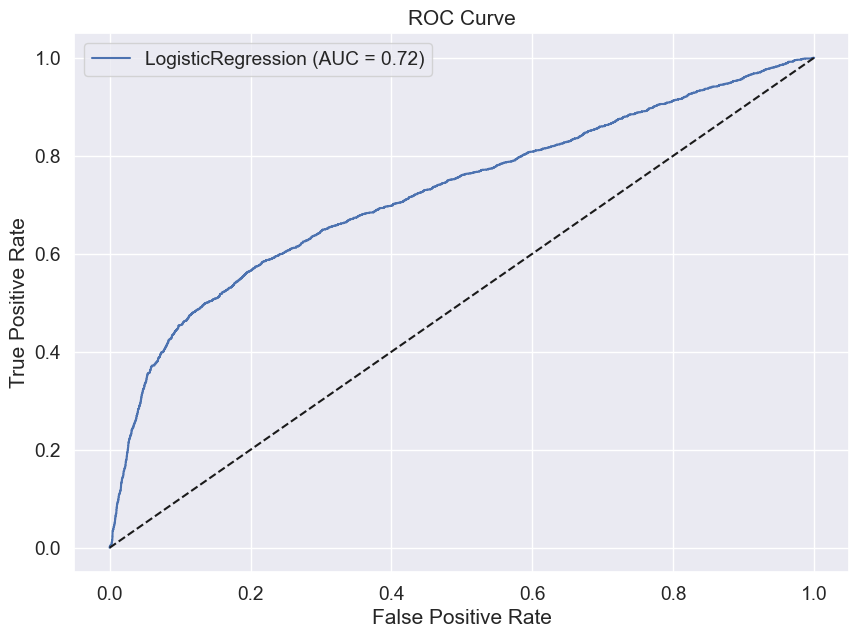

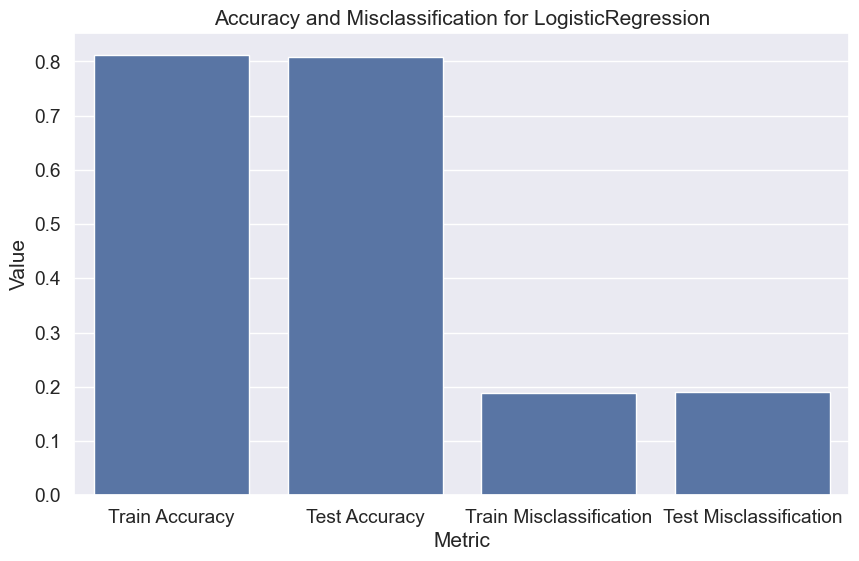

Model: DecisionTree
The accuracy on train data is  0.8435714285714285
The accuracy on test data is  0.805
The precision on train data is  0.742588071154517
The precision on test data is  0.5832656376929326
The recall on train data is  0.4553036783575706
The recall on test data is  0.3663265306122449
The f1 on train data is  0.5644968845287021
The f1 on test data is  0.4500156690692573
The roc_auc_score on test data is  0.7133805731099258


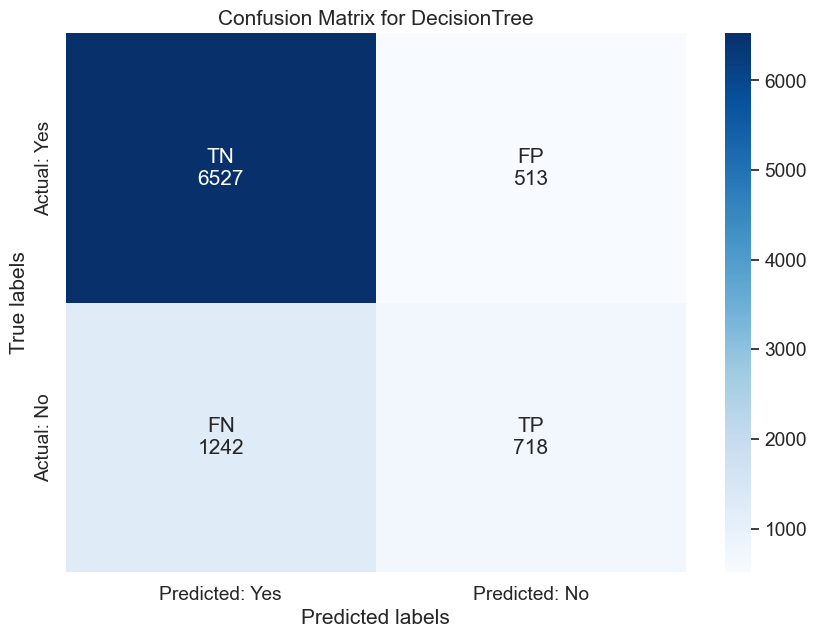

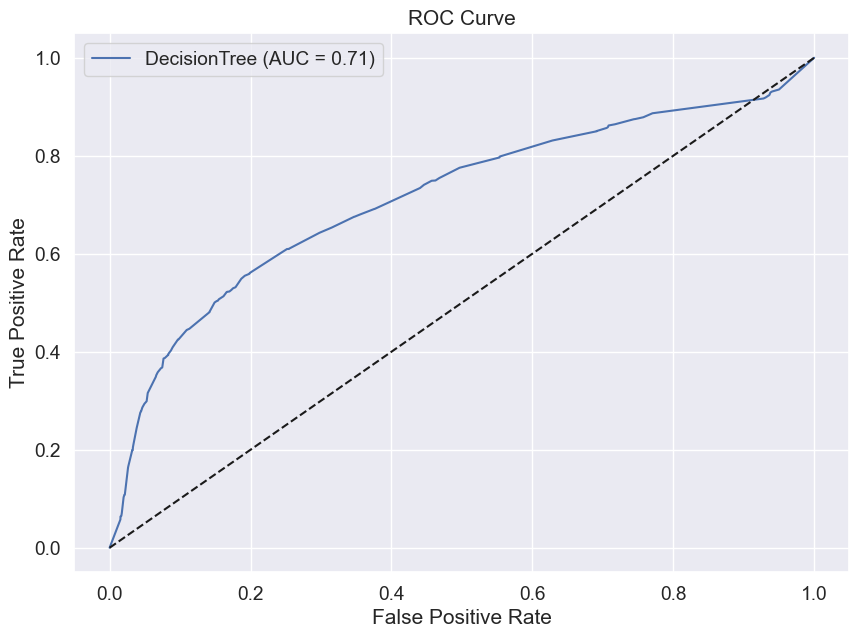

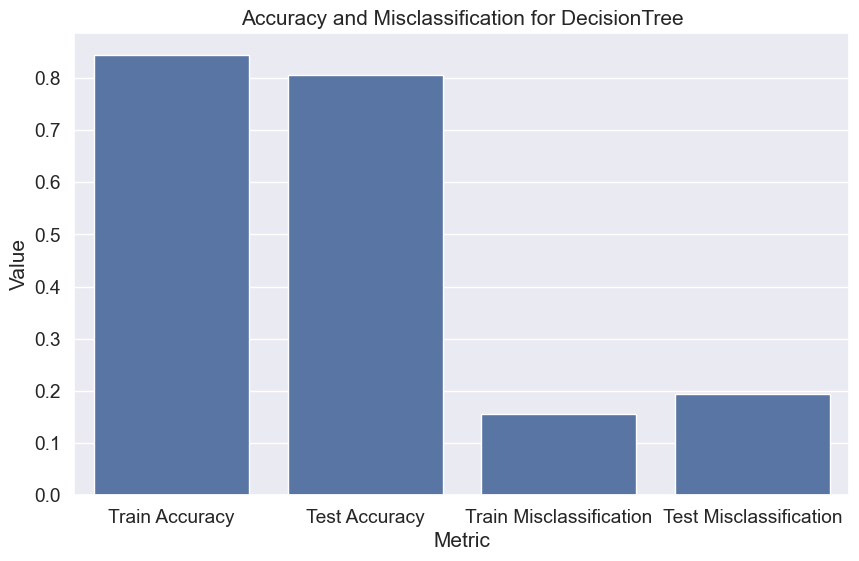

Model: RandomForest
The accuracy on train data is  0.8588095238095238
The accuracy on test data is  0.8212222222222222
The precision on train data is  0.8312040263259776
The precision on test data is  0.6647887323943662
The recall on train data is  0.459153122326775
The recall on test data is  0.36122448979591837
The f1 on train data is  0.5915415346466455
The f1 on test data is  0.468099173553719
The roc_auc_score on test data is  0.7741874420222634


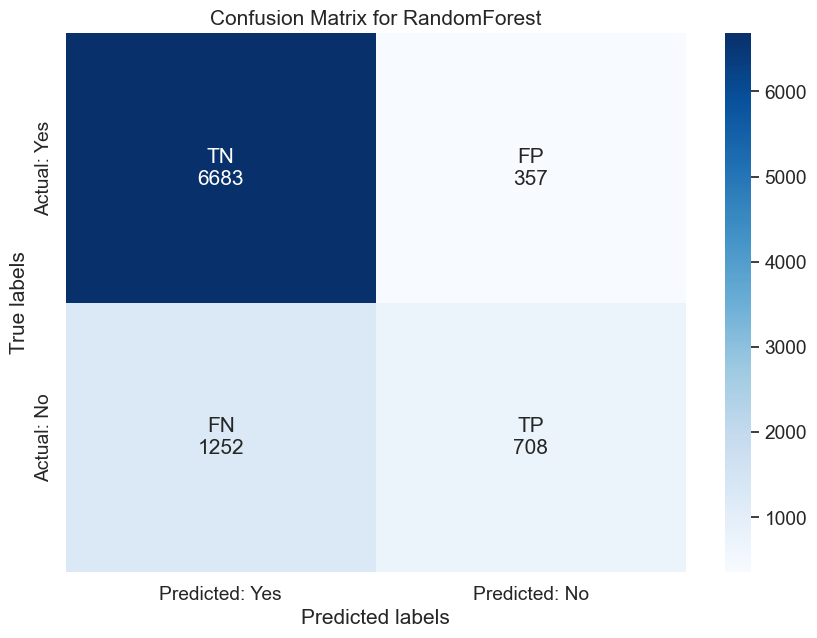

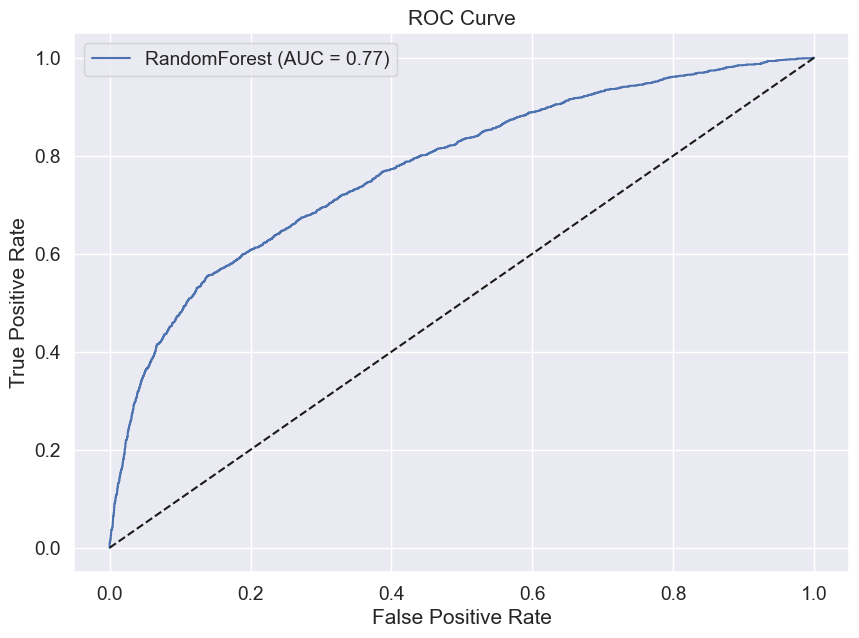

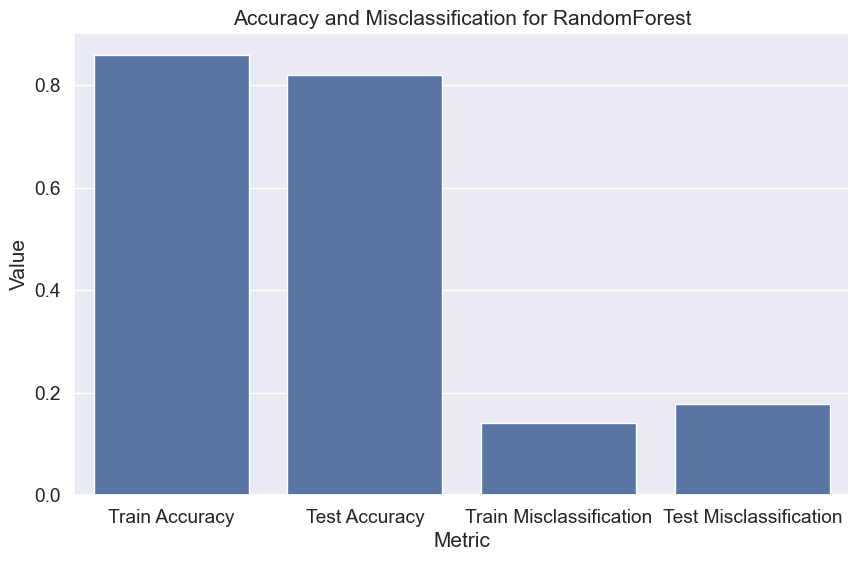

Model: KNeighbors
The accuracy on train data is  0.8260952380952381
The accuracy on test data is  0.8074444444444444
The precision on train data is  0.6987577639751553
The precision on test data is  0.607176581680831
The recall on train data is  0.3849443969204448
The recall on test data is  0.3280612244897959
The f1 on train data is  0.49641478212906787
The f1 on test data is  0.425968863862206
The roc_auc_score on test data is  0.7239859693877551


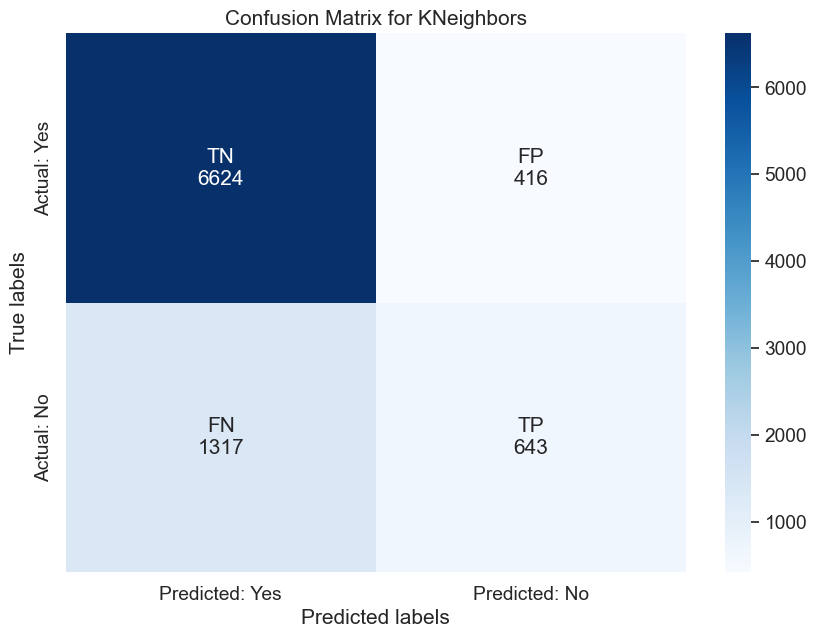

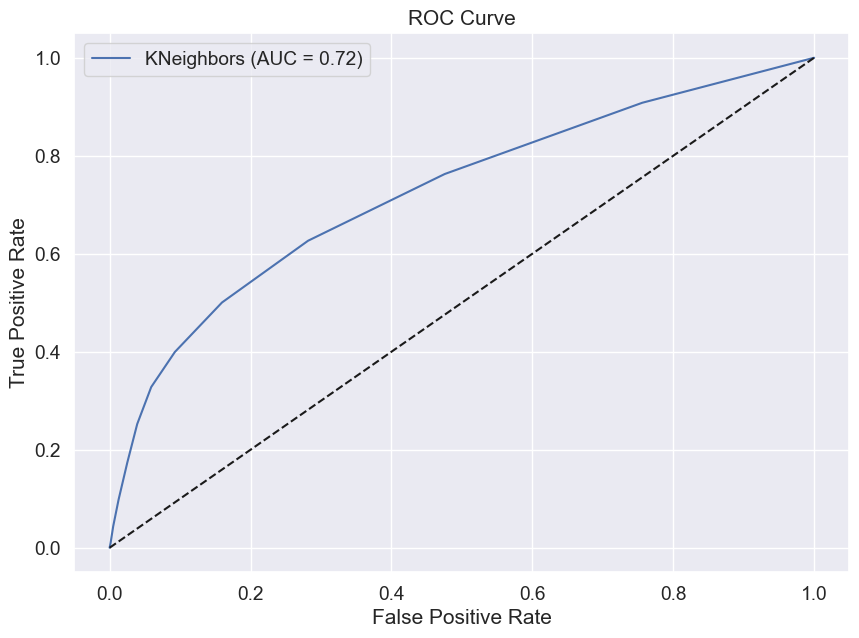

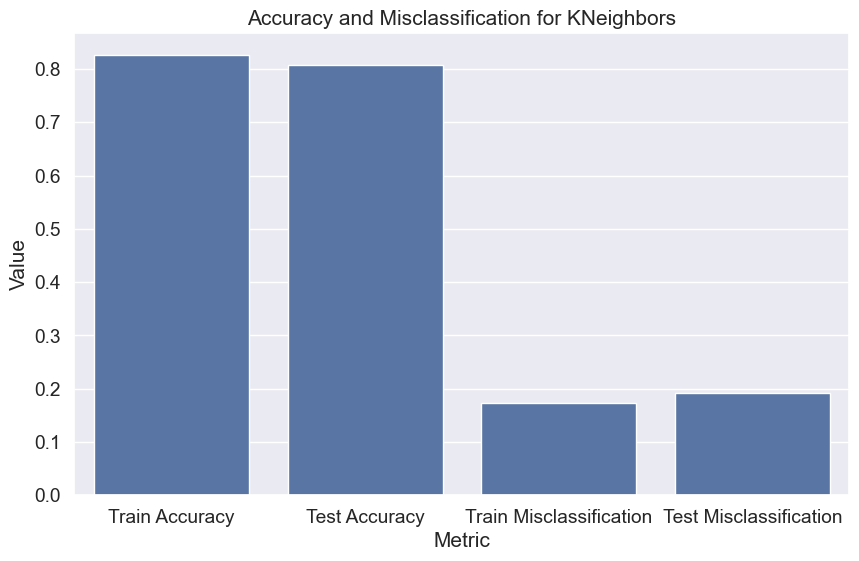

Model: AdaBoost
The accuracy on train data is  0.8194285714285714
The accuracy on test data is  0.82
The precision on train data is  0.6990990990990991
The precision on test data is  0.6868131868131868
The recall on train data is  0.3319076133447391
The recall on test data is  0.31887755102040816
The f1 on train data is  0.45011600928074247
The f1 on test data is  0.4355400696864111
The roc_auc_score on test data is  0.7057428035134509


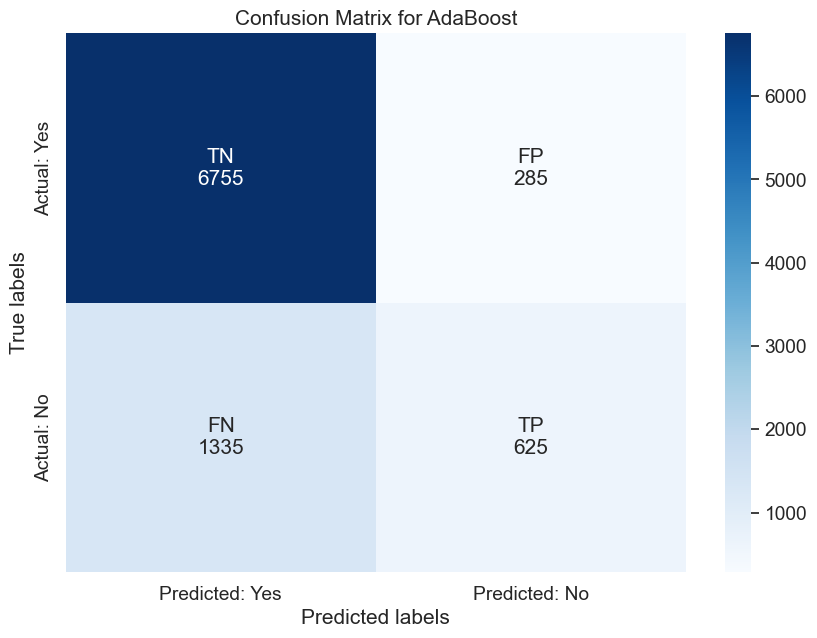

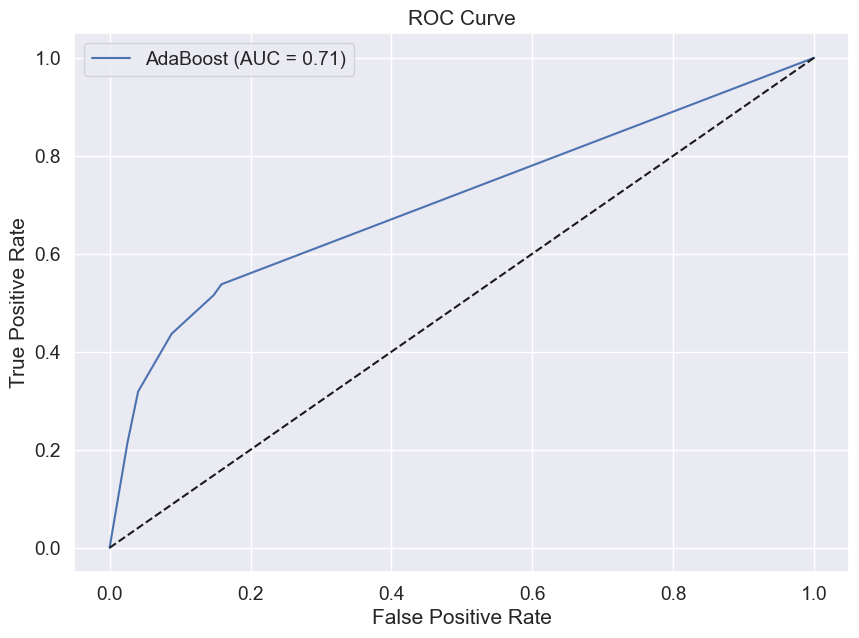

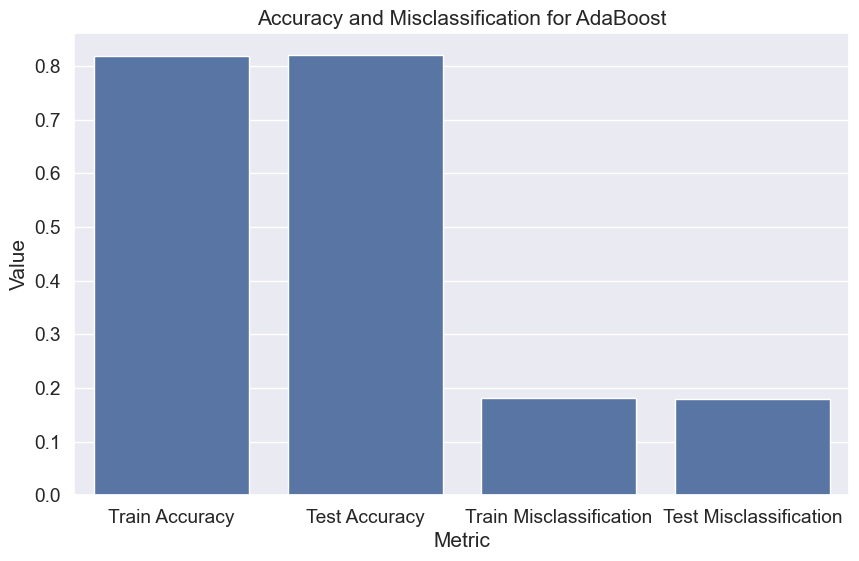

Model: XGBoost
The accuracy on train data is  0.8265238095238095
The accuracy on test data is  0.8198888888888889
The precision on train data is  0.7042309213127719
The precision on test data is  0.6640851887705711
The recall on train data is  0.38088109495295125
The recall on test data is  0.35
The f1 on train data is  0.4943789035392089
The f1 on test data is  0.4584029401937855
The roc_auc_score on test data is  0.7784536975301485


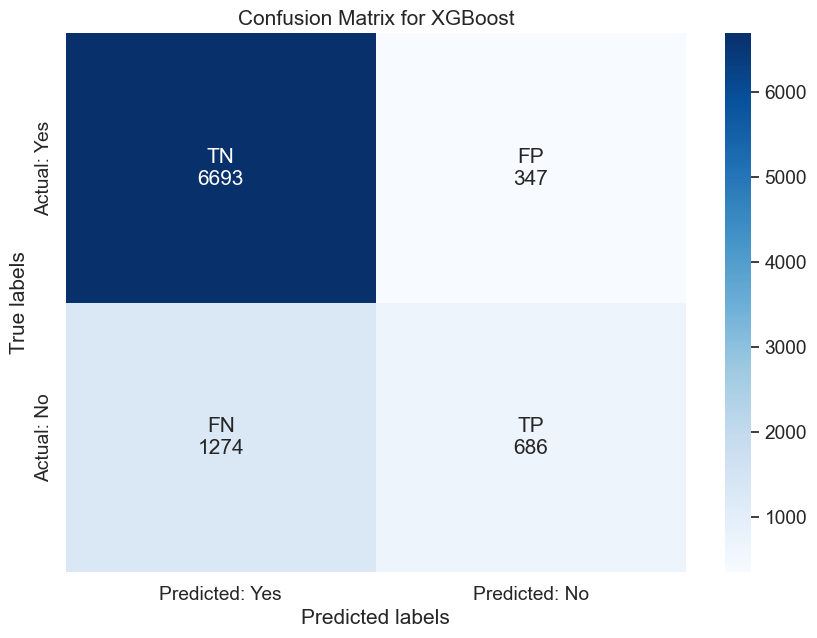

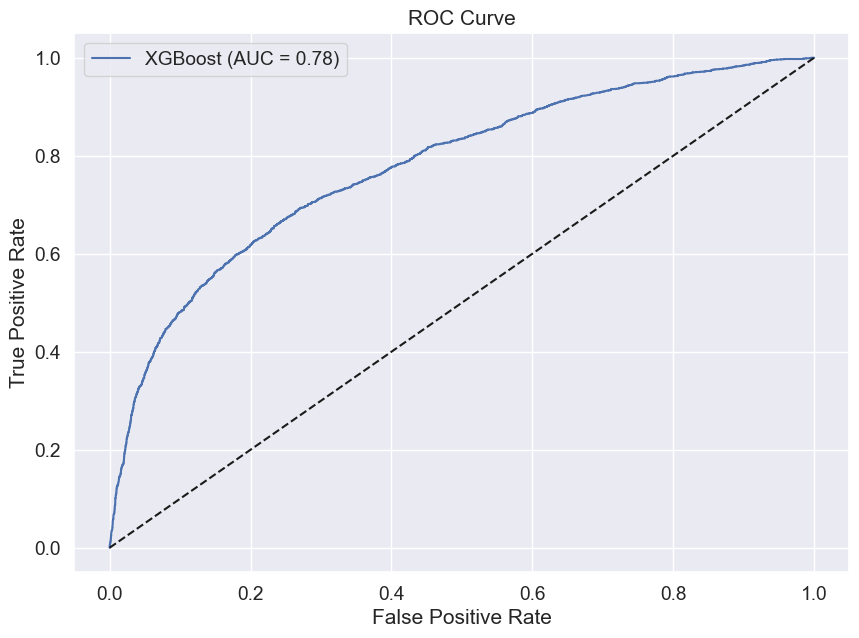

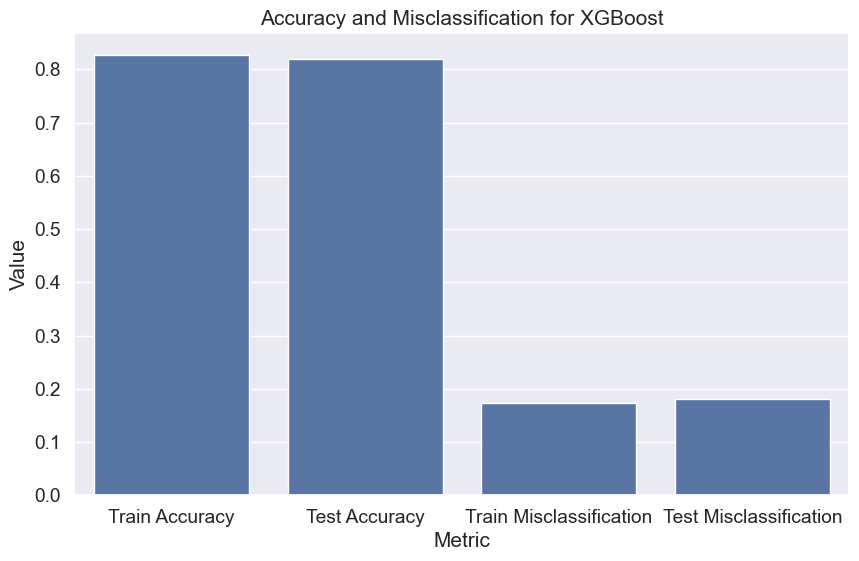

Model: Bagging
The accuracy on train data is  0.9410952380952381
The accuracy on test data is  0.8155555555555556
The precision on train data is  0.979905107451856
The precision on test data is  0.6322751322751323
The recall on train data is  0.7508554319931565
The recall on test data is  0.36581632653061225
The f1 on train data is  0.8502239980627194
The f1 on test data is  0.46347769877181644
The roc_auc_score on test data is  0.7561821660482374


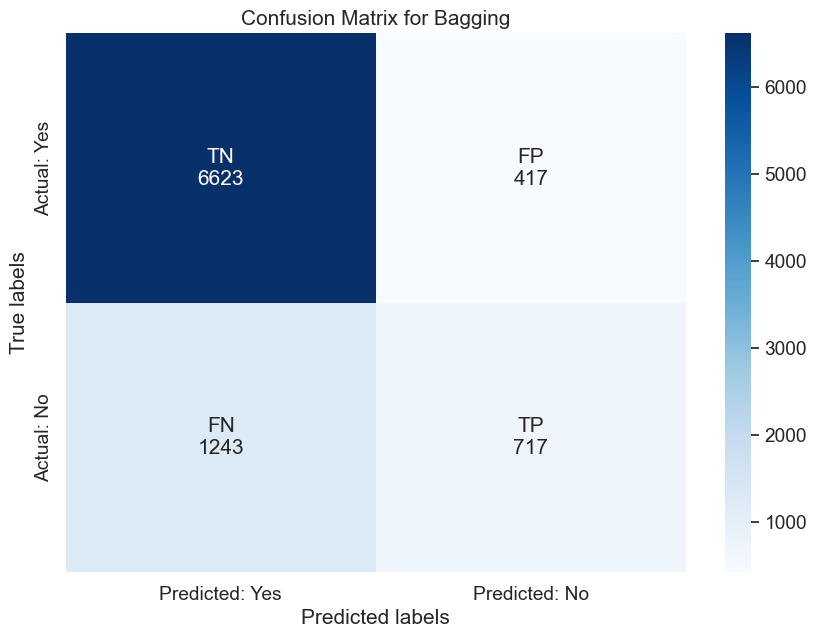

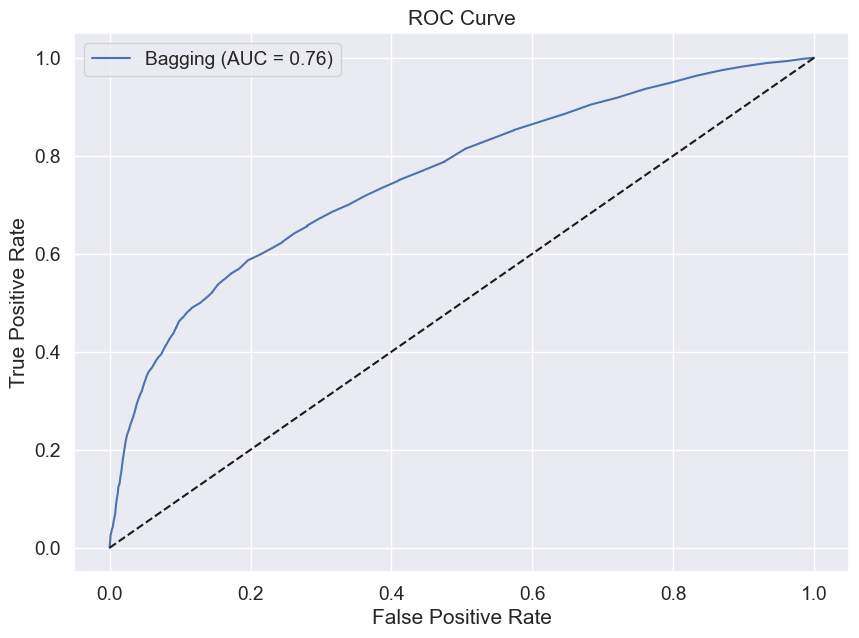

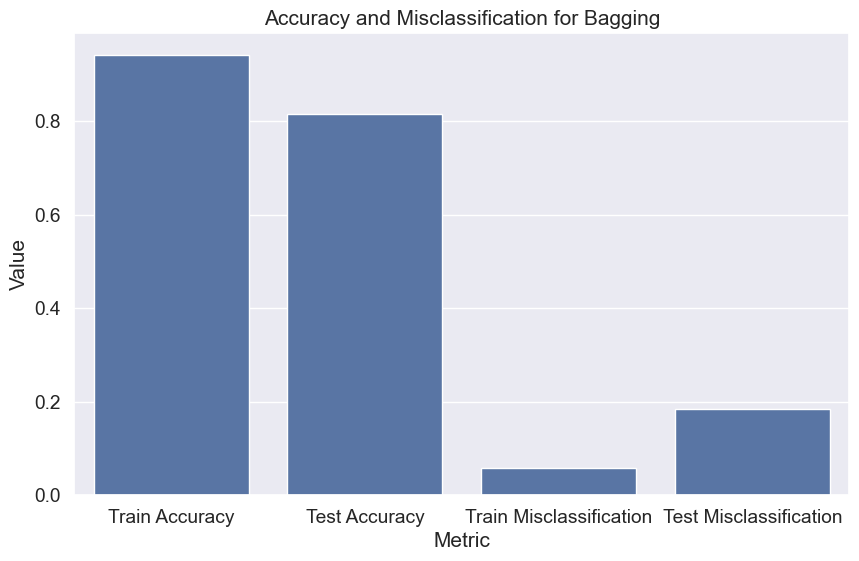

Model: Stacking
The accuracy on train data is  0.9994285714285714
The accuracy on test data is  0.815
The precision on train data is  0.9993576017130621
The precision on test data is  0.6444662095984329
The recall on train data is  0.9980752780153977
The recall on test data is  0.3357142857142857
The f1 on train data is  0.9987160282473786
The f1 on test data is  0.44146259644414626
The roc_auc_score on test data is  0.7595998811456399


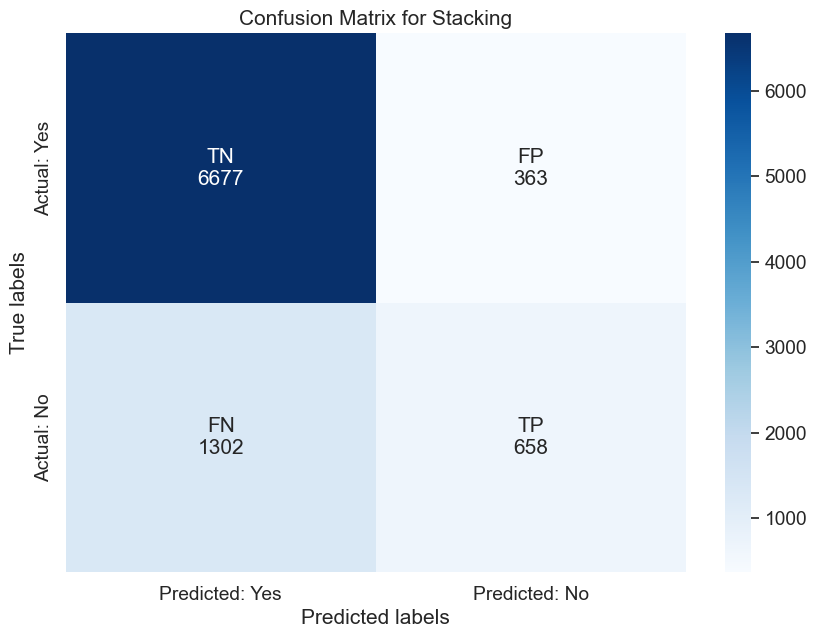

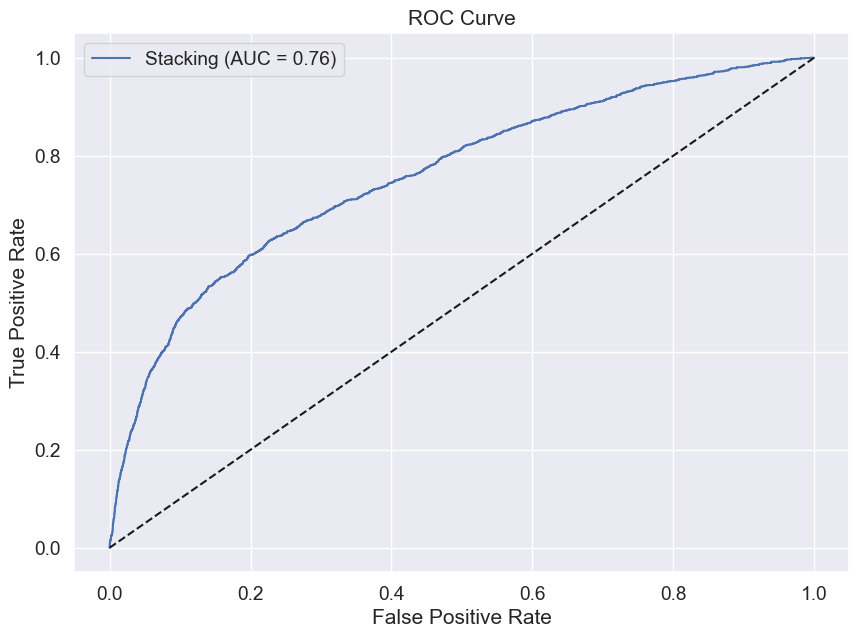

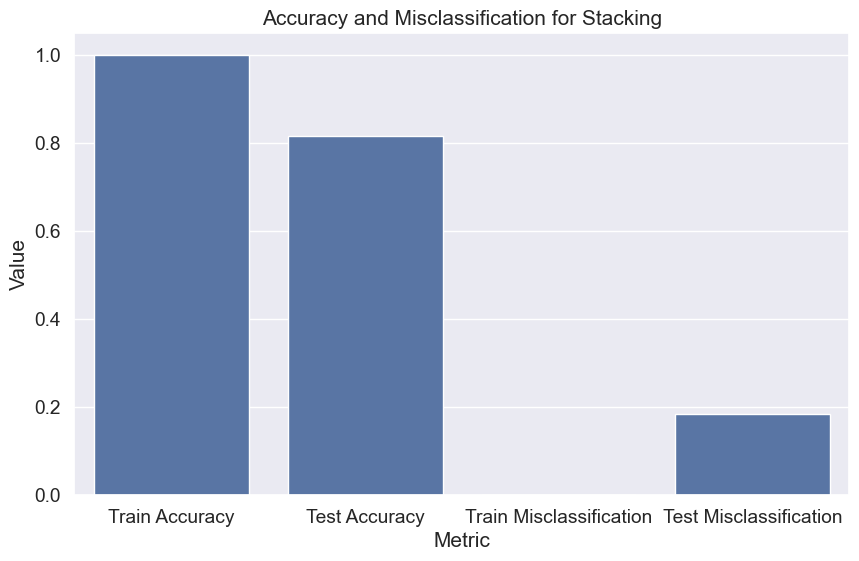

Model: ensemble_ML
The accuracy on train data is  0.8529047619047619
The accuracy on test data is  0.8132222222222222
The precision on train data is  0.8528234771009338
The precision on test data is  0.6476190476190476
The recall on train data is  0.4101796407185629
The recall on test data is  0.3122448979591837
The f1 on train data is  0.5539350180505415
The f1 on test data is  0.42134251290877794
The roc_auc_score on test data is  0.7565209734461966


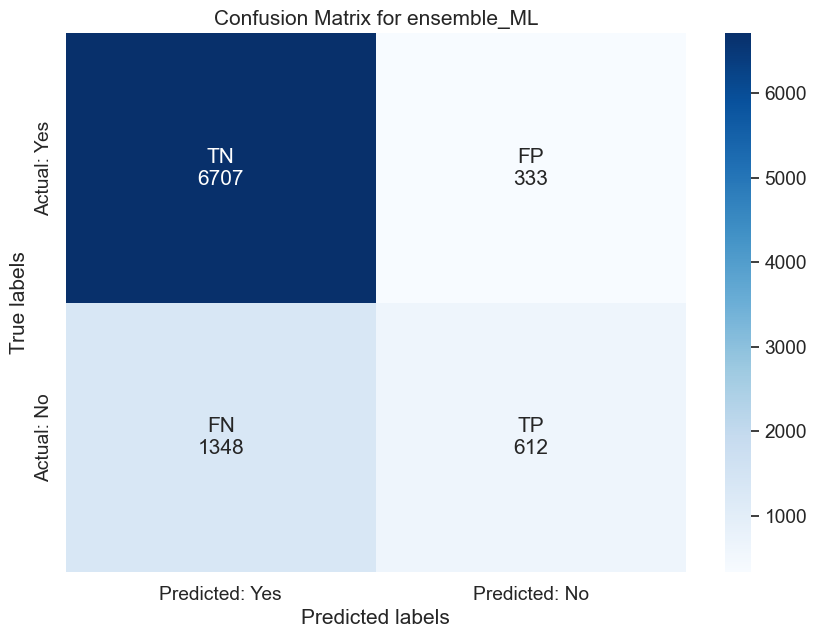

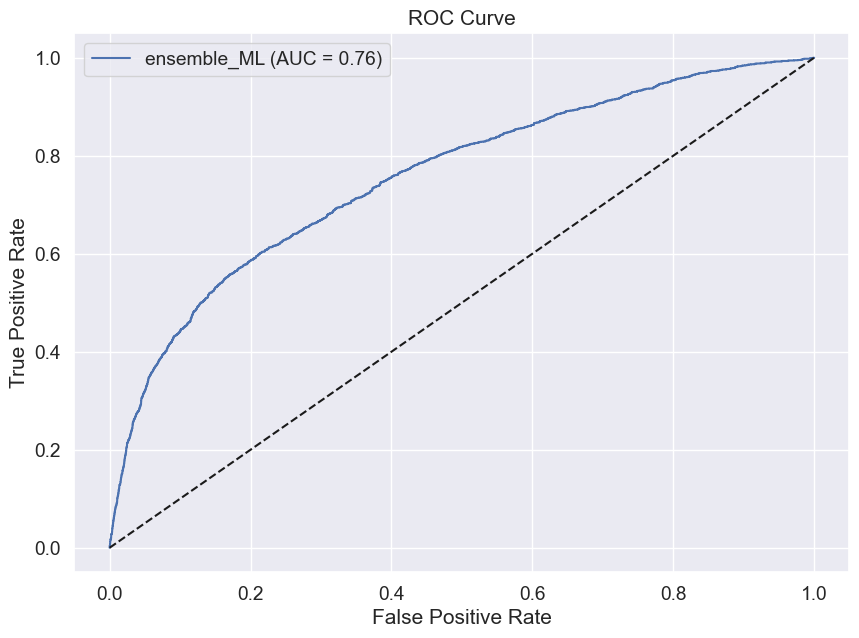

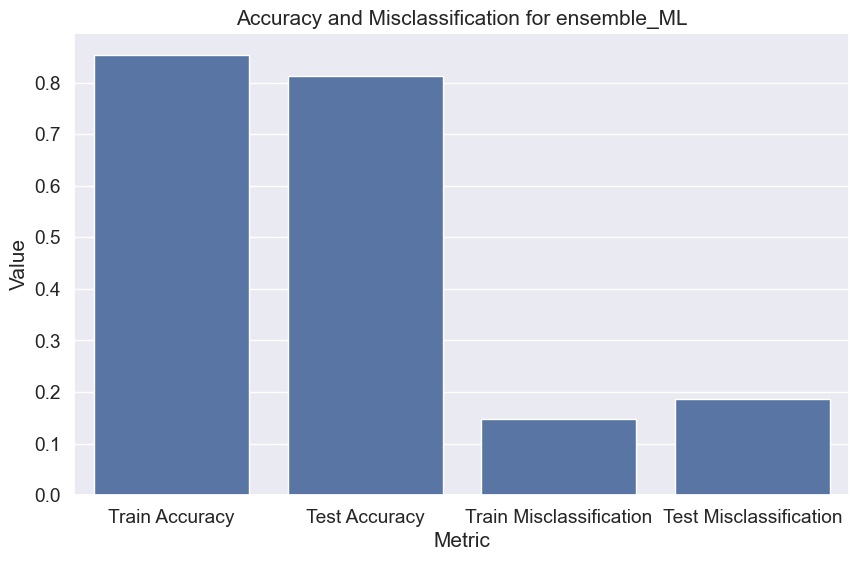

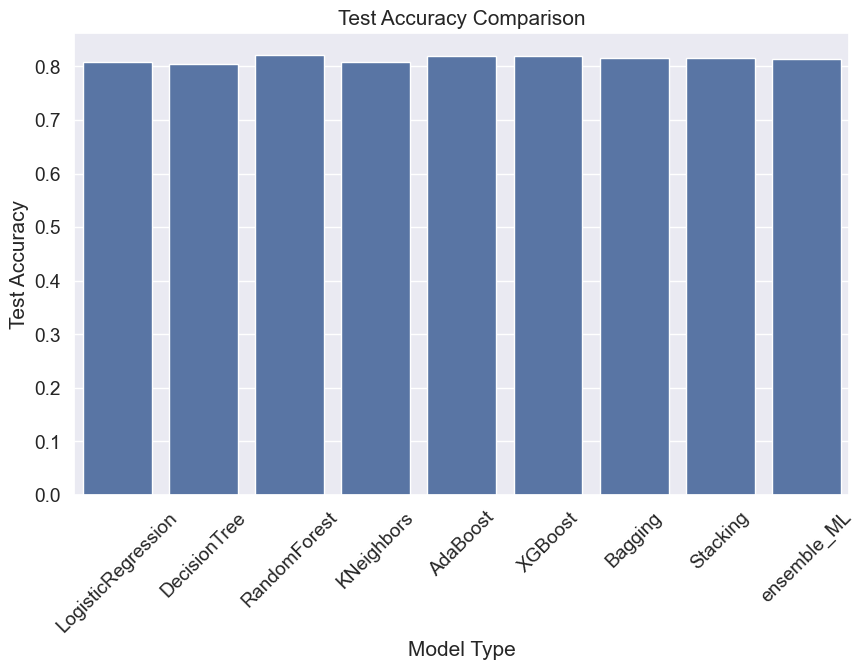

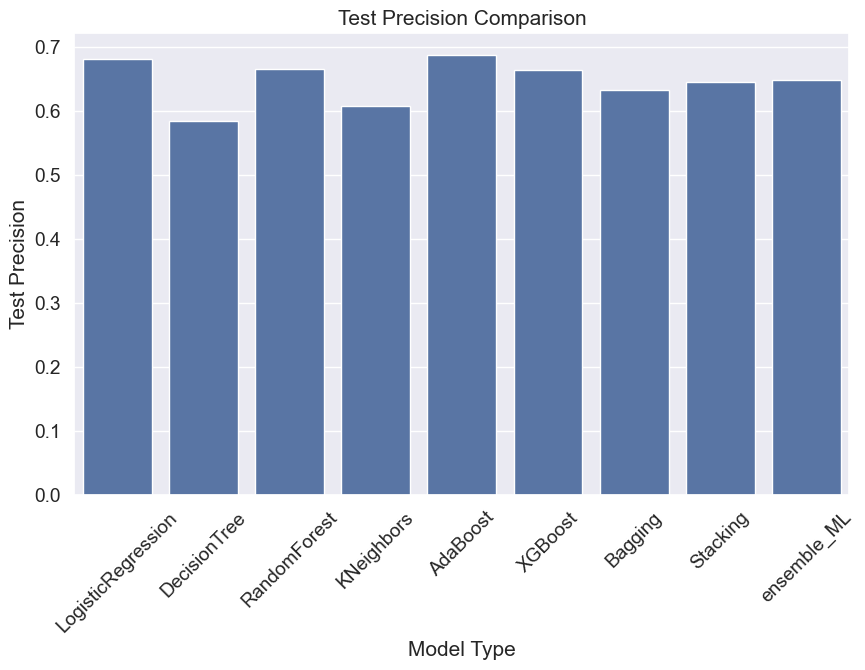

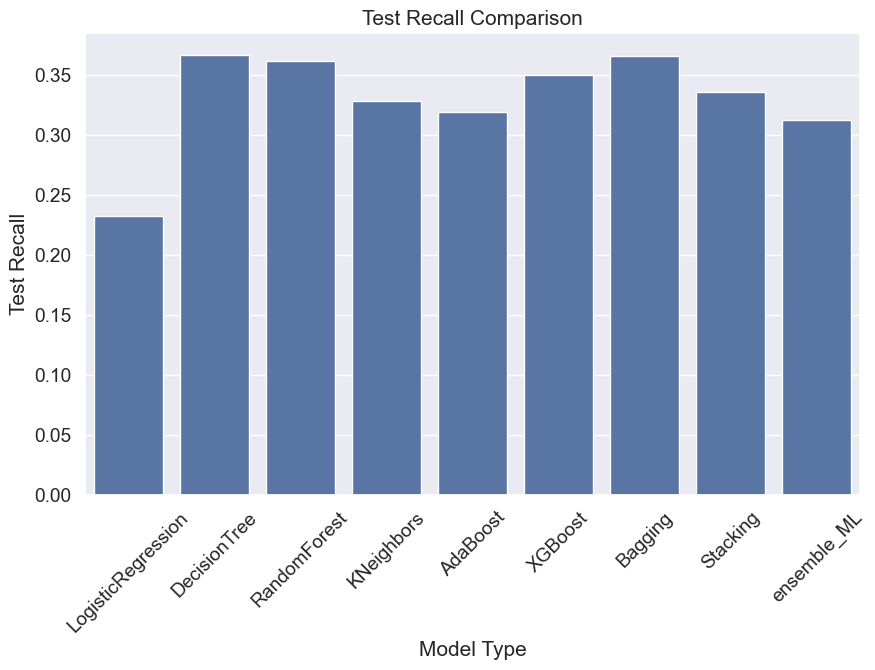

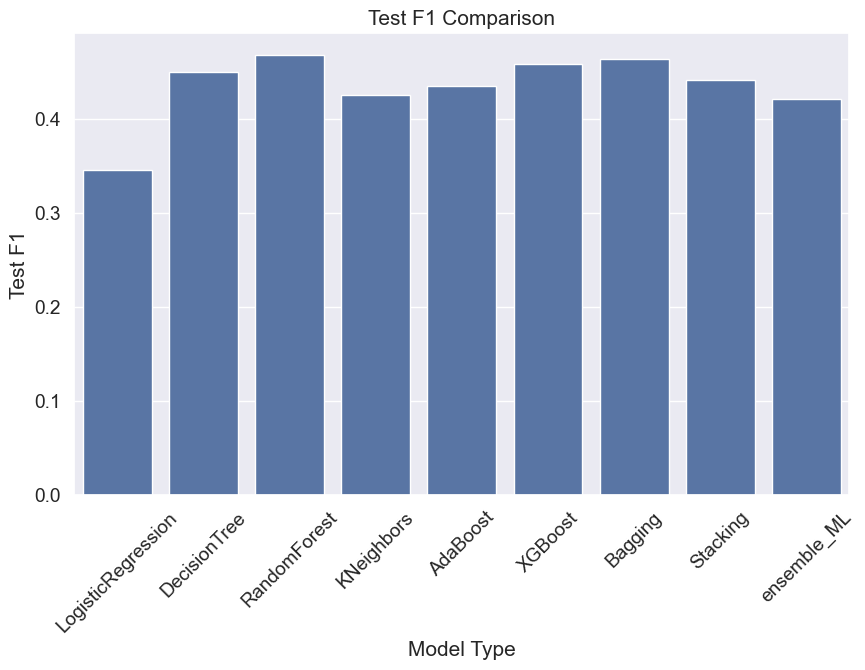

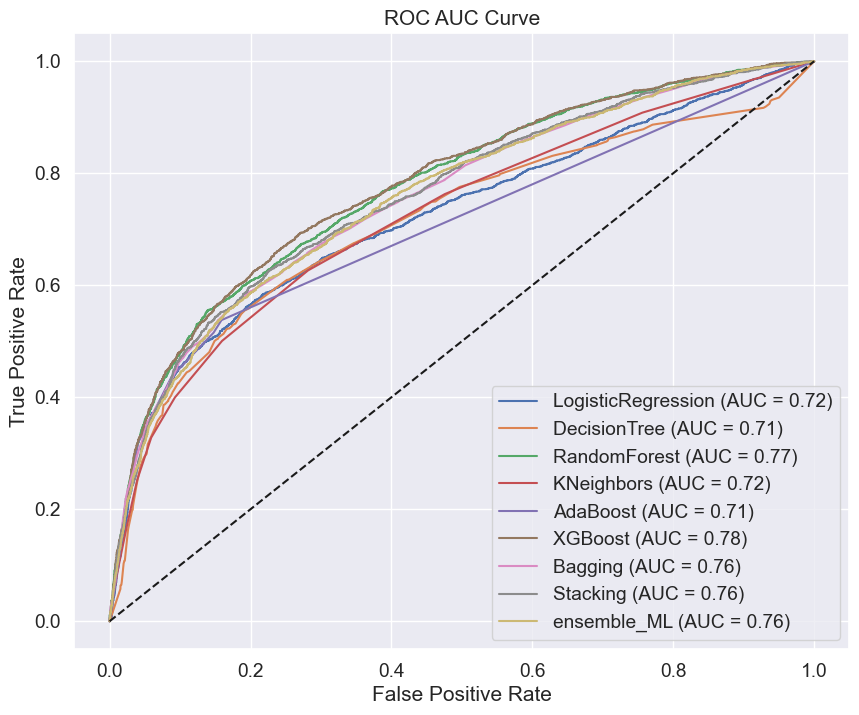

In [38]:


# models = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighbors', 'SVM', 'AdaBoost', 'XGBoost', 'Bagging', 'Stacking']
models = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighbors', 'AdaBoost', 'XGBoost', 'Bagging', 'Stacking']
# Run without ensemble mode
evaluate_classification_models(models, defaulters, target_var, feature_list, target_lables)
